## Exercícios de revisão - RESOLUÇÃO

### Método de Euler e método das diferenças finitas 



### Método de Euler
*Adaptado de [Boyce (2020)](https://integrada.minhabiblioteca.com.br/reader/books/9788521637134/epubcfi/6/28%5B%3Bvnd.vst.idref%3Dchapter02%5D!/4/742/5:19%5Bm%C3%A9r%2Cica%5D).*

O método de Euler fornece a solução numérica para equações diferenciais ordinárias da forma

$$ \frac{dy}{dx} = f(x,y) $$

usando um método de _passo único_ em que obtemos um processo iterativo para obter a solução para cada ponto $y_{i+1}$ a partir de um ponto $y_i$ conhecido. Fazemos isso considerando a derivada no ponto $x_i$ para obter o valor da função no ponto $x_{i+1}$ em que o tamanho de cada _passo_ é dado por $h = x_{i+1} - x_i$. Matemativamente, escrevemos

$$ y_{i+1} = y_i + f(x_i, y_{i}) h$$

Assim, a inclinação no ponto $(x_i,y_i)$, tomada como sendo $y_i' = f(x_i,y_i)$, é usada para extrapolar de um valor antigo $y_i$ para um valor novo $y_{i+1}$ em uma distância $h$. 

### Uma melhoria no método de Euler (método de Heun)

*Adaptado de [Chapra e Canalle (2016, p.651)](https://integrada.minhabiblioteca.com.br/reader/books/9788580555691/pageid/651).*

Uma melhoria nos resultados do método de Euler pode ser obtida melhorando a estimativa da inclinação $y_i'$. No método a inclinação em $y_i$ é tomada como sendo constante e igual a $dy/dx$ ao longo do intervalo. O método de Heus consiste em usar a inclinação média $\bar y'$ entre a inclinação nos dois extremos do intervalo, ou seja:

$$ \bar y'= \frac{y_i'+y_{i+1}'}{2}$$

em que $y_{i+1}'$ é estimada fazendo
$$
y_{i+1}^{\prime}=f\left(x_{i+1}, y_{i+1}^*\right) \quad \text{com} \quad y_{i+1}^0=y_i+f(x_i, y_i)h
$$

Aqui, $y_{i+1}^0$ é a primeira aproximação obtida pelo método de Euler, uma estimativa preditiva da inclinação, então, uma correção nessa aproximação é realizada usando a média das inclinações estimadas em $x_i$ e $x_{i+1}$. 

Essa inclinação média é, então, usada para extrapolar linearmente de $y_i$ a $y_{i+1}$

$$y_{i+1} = yi + \bar y'h$$

O método de Heun é uma abordagem do tipo *preditor-corretor* e pode ser usada repetidamente realizadno múltiplas iterações de correção da inclinação.

**Exemplo resolvido:** [(Chapra e Canale, 2016, p. 653)](https://integrada.minhabiblioteca.com.br/reader/books/9788580555691/pageid/653)

Use o método de Heun para integrar $y^{\prime}=4 e^{0.8 x}-0,5 y$ de $x=0$ a $x=4$ com tamanho do passo 1 . A condição inicial em $x=0$ é $y=2$.

In [2]:
import numpy as np

#Método de Heun
def heun(a,b,h,f,fe,n):
    yi = [2]
    xi = np.arange(a,b+2*h,h)  
    y_ex = fe(xi)
    for i in range(len(xi)-1):
        err = 10.0
        dy = f(xi[i],yi[i])
        y = yi[i]+h*dy            #previsor (Euler)
        y_ant = y                 #guarda iteração anterior
        #n iterações
        for k in range(n):           #iterações 
            dy0 = f(xi[i+1],y)        #corretor
            y = yi[-1]+h*(dy+dy0)/2   #metodo de Heun
            err = abs(y-y_ant)/abs(y) #calcula o erro
            y_ant = y                 #atualiza iteração anterior
        yi.append(y)                        #inclui o resultado na lista
        print (xi[i], y_ex[i], yi[i], err)  #imprime


a = 0.0                                #início
b = 4.0                                #fim
h = 1.0                                #passo
f = lambda x,y: 4*np.exp(0.8*x)-0.5*y  #função

# solução exata
fe = lambda x: (4/1.3)*(np.exp(0.8*x)-np.exp(-0.5*x))+2*np.exp(-0.5*x)


In [3]:
heun(a,b,h,f,fe,1)

0.0 2.0 2 0.25385182471869033
1.0 6.194631377209372 6.701081856984936 0.24921149748890042
2.0 14.84392190764649 16.31978193789828 0.2480487779717735
3.0 33.67717176796817 37.199248896864745 0.2477320670388547
4.0 75.33896260915857 83.33776733540077 0.24764387442549554


In [4]:
heun(a,b,h,f,fe,15)

0.0 2.0 2 9.9625174649684e-10
1.0 6.194631377209372 6.360865486855353 9.797664900539922e-10
2.0 14.84392190764649 15.302236659731868 9.75736166799688e-10
3.0 33.67717176796817 34.743276090677924 9.746769595727495e-10
4.0 75.33896260915857 77.73509619396161 9.743931514353492e-10


Exercícios:
---

In [3]:
# Importando as bibliotecas
import numpy as np
import matplotlib.pyplot as plt

**1.** Considere o problema de valor inicial ([Boyce, 2020, p.54](https://integrada.minhabiblioteca.com.br/reader/books/9788521637134/epubcfi/6/28%5B%3Bvnd.vst.idref%3Dchapter02%5D!/4/804/22/1:0%5B%2Ct%5D))

$$
\frac{d y}{d t}=3-2 t-0,5 y, \quad y(0)=1 .
$$

Use o método de Euler com passos de tamanho $h = 0,2$ para encontrar valores aproximados da solução do problema de valor inicial em $t = 0,2$; $0,4$; $0,6$; $0,8$ e $1$. Compare-os com os valores correspondentes da solução exata $y=14-4 t-13 e^{-t / 2}$.

Em seguida, use diversos tamanhos de passos para calcular valores aproximados da solução para $0 ≤ t ≤ 5$. Compare os resultados calculados com os valores correspondentes da solução exata. Plote os gráficos.

In [82]:
def euler(a,b,h,f,y0):
    n = int((b-a)/h)
    yi = [y0]
    ti = np.linspace(a,b,n+1)
    for i in range(n):
        y = yi[i]+h*f(yi[i],ti[i])
        yi.append(y)
    return ti, yi

Solução aproximada: yi = [1, 1.5, 1.87, 2.123, 2.2707, 2.32363]


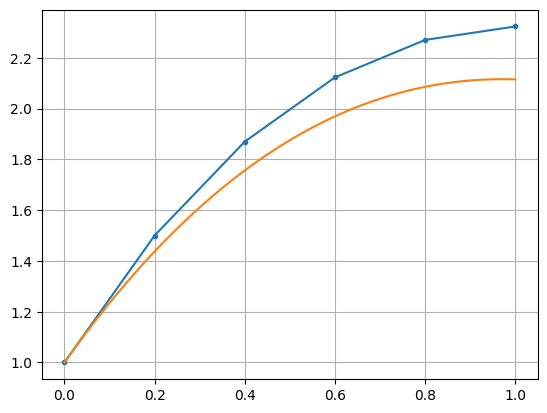

In [83]:
h = 0.2
f = lambda y,t: 3-2*t-0.5*y
a = 0.0; b = 1.0
y0 = 1

ti, yi = euler(a, b, h, f, y0)
print ("Solução aproximada: yi =", yi)

# plotando solução aproximada
plt.plot(ti,yi,'.-')

# plotando solução exata
ti = np.arange(a,b+0.01,0.01)
fe = lambda y,t: 14-4*ti-13*np.exp(-ti/2)
plt.plot(ti, fe(yi, ti),'-')
plt.grid()


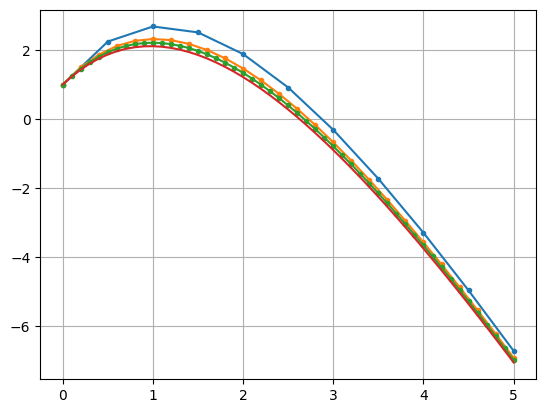

In [84]:
ti, yi = euler(0, 5, 0.5, f, 1)
plt.plot(ti,yi,'.-')

ti, yi = euler(0, 5, 0.2, f, 1)
plt.plot(ti,yi,'.-')z

ti, yi = euler(0, 5, 0.1, f, 1)
plt.plot(ti,yi,'.-')

# plotando solução exata
plt.plot(ti, fe(yi, ti),'-')
plt.grid()

**2.** Considere o problema de valor inicial ([Boyce, 2020, p.56](https://integrada.minhabiblioteca.com.br/reader/books/9788521637134/epubcfi/6/28%5B%3Bvnd.vst.idref%3Dchapter02%5D!/4/758/6%4052:53))

$$
\frac{d y}{d t}=4-t+2 y, \quad y(0)=1 .
$$

Use o método de Euler e o método de Heun (Euler melhorado), com o mesmo número de pontos na discretização, para encontrar valores aproximados da solução no intervalo $0 \leq t \leq 5$. Compare os resultados com os valores correspondentes da solução

$$
y=-\frac{7}{4}+\frac{1}{2} t+\frac{11}{4} e^{2 t} .
$$

Plote os gráficos.

In [ ]:
def heun(a,b,h,f,y0, eps):
    ti = np.arange(a,b+h,h)
    yi = [y0]
    for i in range(len(ti)-1):
        err = 10.0
        dy = f(yi[i],ti[i])
        y = yi[i]+h*dy  #previsor
        y_ant = y
        while err>eps:
            dy0 = f(y,ti[i+1])
            y = yi[-1]+h*(dy+dy0)/2 #corretor
            err = abs(y-y_ant)/abs(y)
            y_ant = y
            print (i, err)
        yi.append(y)
    return ti, yi

Solução aproximada Euler: yi = [2, 6.0, 13.75, 29.0, 59.25, 119.5, 239.75, 480.0, 960.25]
0 0.23809523809523808
1 0.2112676056338028
2 0.20347259902333154
3 0.20102926986169187
4 0.200273440003418
5 0.2000546282504876
6 0.2
7 0.19999126224842487
Solução aproximada Heun: yi = [2, 7.875, 22.1875, 57.59375, 145.734375, 365.7109375, 915.27734375, 2288.818359375, 5722.2958984375]


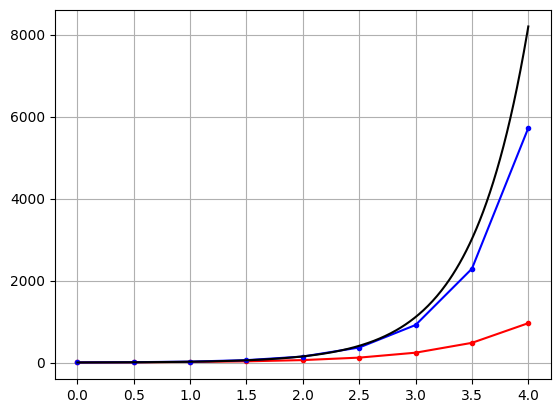

In [122]:
h = 0.5
f = lambda y,t: 4-t+2*y
#f = lambda y,t: 4*np.exp(0.8*t)-0.5*y #exemplo 25.5, Chapra (2016)

a = 0.0; b = 4.0
y0 = 2

ti, yi = euler(a, b, h, f, y0)
print ("Solução aproximada Euler: yi =", yi)
plt.plot(ti,yi,'r.-')

ti, yi = heun(a, b, h, f, y0, 0.5)
print ("Solução aproximada Heun: yi =", yi)
plt.plot(ti,yi,'b.-')



# plotando solução exata
ti = np.arange(a,b+0.01,0.01)
fe = lambda y,t: -7./4+0.5*t+11./4*np.exp(2*ti)
#fe = lambda y,t: (4/1.3)*(np.exp(0.8*t)-np.exp(-0.5*t))+2*np.exp(-0.5*t) #exemplo 25.5, Chapra (2016)
plt.plot(ti, fe(yi, ti),'k-')
plt.grid()

**3.** Para cada um dos problemas a seguir, encontre a solução exata e soluções numéricas com três diferentes discretizações no intervalo $0,1 <= t <= 0.5$. Plote os gráficos  ([Boyce, 2020, p.57](https://integrada.minhabiblioteca.com.br/reader/books/9788521637134/epubcfi/6/28%5B%3Bvnd.vst.idref%3Dchapter02%5D!/4/850/2/1:7%5Blem%2Cas%5D)). 

$\begin{aligned} 
& \quad \quad (a) \quad y^{\prime}=3+t-y, \quad y(0)=1 \\
& \quad \quad (b) \quad y^{\prime}=2 y-1, \quad y(0)=1 \\ 
& \quad \quad (c) \quad y^{\prime}=0,5-t+2 y, \quad y(0)=1 \\ 
& \quad \quad (d) \quad y^{\prime}=3 \cos t-2 y, \quad y(0)=0
\end{aligned}$

### Diferenças finitas para problema lineares
*Adaptado de ([Burden, Richard, L. et al., 2016](https://integrada.minhabiblioteca.com.br/reader/books/9788522123414/pageid/783))*

Dado o problema de contorno de segunda ordem linear

$$
y^{\prime \prime}=p(x) y^{\prime}+q(x) y+r(x), \quad \text { para } a \leq x \leq b \operatorname{com} y(a)=\alpha \text { e } y(b)=\beta,
$$

a resolução pelo método das diferenças finitas requer aproximações numéricas para $y'$ e $y''$ em um conjunto pontos que dividem o intervalo $[a,b]$ em $N+1$ subintervalos cujos extremos são os pontos $x_i=a+ih$, com $i=0,1,2,...,N+1$ da malha, e $h=(b-a)/(N+1))$.

Aproximando $y'$ e $y''$ pela fórmula de diferenças centradas obtemos uma equação na forma

$$
\left(\frac{-y_{i+1}+2 y_i-y_{i-1}}{h^2}\right)+p\left(x_i\right)\left(\frac{y_{i+1}-y_{i-1}}{2 h}\right)+q\left(x_i\right) y_i=-r\left(x_i\right)
$$

para cada $i=1,2,...,N$. 

As equações podem ser reescritas na forma 
$$
-\left(1+\frac{h}{2} p\left(x_i\right)\right) y_{i-1}+\left(2+h^2 q\left(x_i\right)\right) y_i-\left(1-\frac{h}{2} p\left(x_i\right)\right) y_{i+1}=-h^2 r\left(x_i\right),
$$

que vai gerar o sistema linear tridiagonal $N \times N$ cuja solução dará a solução numérica do problema de valor de contorno.  

**4.** O problema de contorno ([fonte](https://integrada.minhabiblioteca.com.br/reader/books/9788522123414/pageid/789))

$$
y^{\prime \prime}=y^{\prime}+2 y+\cos x, \quad 0 \leq x \leq \frac{\pi}{2}, \quad y(0)=-0,3, \quad y\left(\frac{\pi}{2}\right)=-0,1,
$$

tem a solução $y(x)=-\frac{1}{10}(\operatorname{sen} x+3 \cos x)$. Use o método das diferenças finitas linear para obter uma aproximação para a solução e compare os resultados com a solução real. Repita para diferentes valores de $h$.

**5.** O problema de contorno ([fonte](https://integrada.minhabiblioteca.com.br/reader/books/9788522123414/pageid/789))

$$
y^{\prime \prime}=4(y-x), \quad 0 \leq x \leq 1, \quad y(0)=0, \quad y(1)=2
$$

tem a solução $y(x)=e^2\left(e^4-1\right)^{-1}\left(e^{2 x}-e^{-2 x}\right)+x$. Use o método das diferenças finitas linear para obter uma aproximação para a solução e compare os resultados com a solução real. Repita para diferentes valores de $h$.

**6.** A deflexão de uma viga, com extremidades apoiadas, sujeita a uma carga uniforme é uma situação física governada pelo seguinte problema de valores de contorno  ([fonte](https://integrada.minhabiblioteca.com.br/reader/books/9788522123414/pageid/789)):

$$
\frac{d^2 w}{d x^2}=\frac{S}{E I} w+\frac{q x}{2 E I}(x-l), \quad 0<x<l
$$

com condições de contorno $w(0)=0$ e $w(l)=0$.

Suponha que se trate de uma viga-I de aço tipo W10 com as seguintes características: comprimento $l=120 \mathrm{pol}$., intensidade da carga uniforme $q=100 \mathrm{lb} /$ pé, módulo de elasticidade $E=3,0 \times 10^7 \mathrm{lb} / \mathrm{pé}^2$, tensão nas extremidades $S=1000 \mathrm{lb}$ e momento de inércia central $I=625 \mathrm{pol}^4$.

**a.** Aproxime a deflexão $w(x)$ da barra a cada 6 pol.

**b.** A relação real é dada por

$$
w(x)=c_1 e^{a x}+c_2 e^{-a x}+b(x-1) x+c,
$$

em que $c_1=7,7042537 \times 10^4$, $c_2=7,9207462 \times 10^4$, $a=2,3094010 \times 10^{-4}$, $b=-4,1666666 \times 10^{-3}$ e   $c=-1,5625 \times 10^5$. O erro máximo no intervalo é inferior a 0,2 pol.?

**c.** Uma lei estadual requer que $ \max _{0 \leq x \leq 1} w(x)<1 / 300 $. A viga atende ao código estadual? 

**7.** A deflexão de uma placa retangular, longa, com carga uniforme, sob uma força de tensão axial é governada por uma equação diferencial de segunda ordem. Represente por $S$ a força axial e por $q$ a intensidade da carga uniforme. A deflexão $W$ ao longo do comprimento é dada por ([fonte](https://integrada.minhabiblioteca.com.br/reader/books/9788522123414/pageid/789)):

$$
W^{\prime \prime}(x)-\frac{S}{D} W(x)=\frac{-q l}{2 D} x+\frac{q}{2 D} x^2, \quad 0 \leq x \leq l, W(0)=W(l)=0,
$$

em que $l$ é o comprimento da placa e $D$ é a resistência da placa à flexão. Sejam $q=200$ lb/pol$^2$, $S=100$ lb/pol., $D=8,8 \times 10^7$ lb/pol., e $l=50$ pol. Aproxime a deflexão em intervalos de 1 pol.

**Exercício resolvido**

**8.** Use o Algoritmo 11.3 (p.769 de [Burden et al., 2016](https://integrada.minhabiblioteca.com.br/reader/books/9788522123414/pageid/785), para obter uma aproximação para a solução do problema de contorno

$$
y^{\prime \prime}=-\frac{2}{x} y^{\prime}+\frac{2}{x^2} y+\frac{\operatorname{sen}(\ln x)}{x^2}, \quad \text { para } 1 \leq x \leq 2, \operatorname{com} y(1)=1 \text { e } y(2)=2,
$$

e compare os resultados com aqueles apresentados na tabela 11.3 de (p.771 de [Burden, et al., 2016](https://integrada.minhabiblioteca.com.br/reader/books/9788522123414/pageid/785)).

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
a = 1.0
b = 2.0
ya = 1
yb = 2

N = 9
h = (b-a)/(N+1)
A = np.zeros((N,N))
b = np.zeros(N)

p = lambda x: -2./x
q = lambda x: 2./x**2
r = lambda x: np.sin(np.log(x))/x**2

In [8]:
x = a+h
A[0,0] = 2+h**2*q(x)
A[0,1] = -1+(h/2)*p(x)
b[0] = -h**2*r(x)+(1+(h/2)*p(x))*ya
#print(x)

for i in range(1,N-1):
    x = a+(i+1)*h
    A[i,i-1] = -1-(h/2)*p(x)
    A[i,i] = 2+h**2*q(x) 
    A[i,i+1] = -1+(h/2)*p(x)
    b[i] = -h**2*r(x)
    #print(x)
    
x = a+(N)*h
#print (x)
A[N-1,N-2] = -1-(h/2)*p(x)
A[N-1,N-1] = 2+h**2*q(x)
b[N-1] = -h**2*r(x)+(1-(h/2)*p(x))*yb

In [9]:
print (np.round(A,3))
print (np.round(b,3))

[[ 2.017 -1.091  0.     0.     0.     0.     0.     0.     0.   ]
 [-0.917  2.014 -1.083  0.     0.     0.     0.     0.     0.   ]
 [ 0.    -0.923  2.012 -1.077  0.     0.     0.     0.     0.   ]
 [ 0.     0.    -0.929  2.01  -1.071  0.     0.     0.     0.   ]
 [ 0.     0.     0.    -0.933  2.009 -1.067  0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.938  2.008 -1.062  0.     0.   ]
 [ 0.     0.     0.     0.     0.    -0.941  2.007 -1.059  0.   ]
 [ 0.     0.     0.     0.     0.     0.    -0.944  2.006 -1.056]
 [ 0.     0.     0.     0.     0.     0.     0.    -0.947  2.006]]
[ 9.080e-01 -1.000e-03 -2.000e-03 -2.000e-03 -2.000e-03 -2.000e-03
 -2.000e-03 -2.000e-03  2.104e+00]


In [5]:
np.linalg.solve(A,b)

array([1.09260052, 1.18704313, 1.28333687, 1.38140205, 1.48112026,
       1.5823599 , 1.68498902, 1.78888175, 1.8939211 ])